In [11]:
import pandas as pd
import numpy as np
import random as rndda

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.model_selection import train_test_split

## Question 2  using pandas we have read the glass data.

In [12]:
main_df = pd.read_csv('glass.csv')
main_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


##In Above code, Using read function to read the glass data.

In [13]:
print(main_df.columns.values)

['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']


##In Above code, Printing the column values.

In [14]:
main_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


##In Above code,Using the head function to get first 5 rows.

In [15]:
print(main_df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


##In Above code,Checking for null values and suming them.

In [16]:
main_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


##In Above code,Using describe function to find count , mean , std ...etc

In [17]:
print(main_df.shape)

(214, 10)


##In Above code,shape is used to find the dimensions .

In [18]:
main_df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

##In Above code,value_counts() is used to count the 'Type' count.

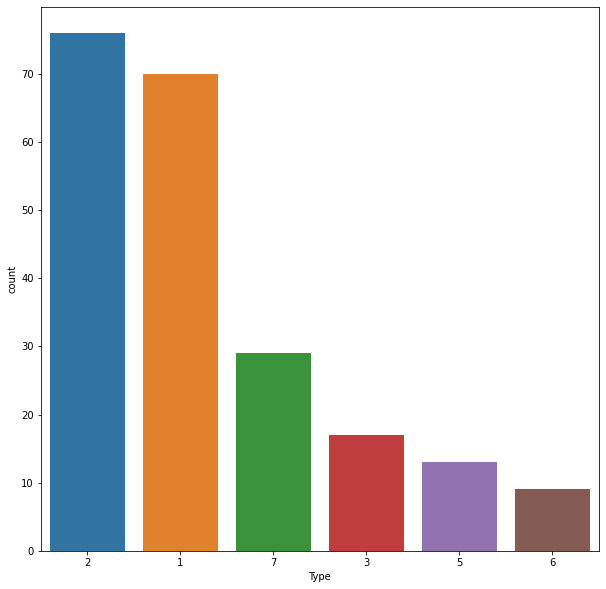

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type', data=main_df, order=main_df['Type'].value_counts().index);

##In Above code,Using countplot() to plot the graph between type and type count.

In [20]:

x_main = main_df.drop('Type', axis=1)
y_main = main_df['Type']

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(x_main, y_main, test_size=0.25, random_state=27)


##In Above code,Using train_test_split() to set up testing and training sets.

In [21]:
## Naives bayes
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, Y_train).predict(X_test)
print(metrics.classification_report(Y_test,y_pred_gnb))
print(metrics.confusion_matrix(Y_test,y_pred_gnb))

              precision    recall  f1-score   support

           1       0.38      0.67      0.48        12
           2       0.56      0.23      0.32        22
           3       0.50      0.33      0.40         3
           5       0.33      0.33      0.33         3
           6       0.50      1.00      0.67         3
           7       0.85      1.00      0.92        11

    accuracy                           0.54        54
   macro avg       0.52      0.59      0.52        54
weighted avg       0.56      0.54      0.50        54

[[ 8  2  1  0  1  0]
 [12  5  0  2  2  1]
 [ 1  1  1  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 11]]


##In Above code,using fit() to get the model and then predict() to predict with the test function.

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_gnb)

0.5370370370370371

##In Above code,To get the accurate value we are using accuracy_score().
here the accuracy is 0.54

In [23]:
##Using SVC method of svm class to use Support Vector Machine Algorithm
svc_lin = SVC(kernel = 'linear', random_state =0)
svc_lin.fit(X_train, Y_train)
y_pred_svc = svc_lin.predict(X_test)
print(accuracy_score(Y_test, y_pred_svc))
print(metrics.classification_report(Y_test,y_pred_svc))
print(metrics.confusion_matrix(Y_test,y_pred_svc))


0.6666666666666666
              precision    recall  f1-score   support

           1       0.59      0.83      0.69        12
           2       0.67      0.55      0.60        22
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       0.33      0.33      0.33         3
           7       0.92      1.00      0.96        11

    accuracy                           0.67        54
   macro avg       0.50      0.56      0.53        54
weighted avg       0.64      0.67      0.64        54

[[10  2  0  0  0  0]
 [ 6 12  0  2  2  0]
 [ 1  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0 11]]


c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Another approach non linear svm

##In Above code,Using classification_report() to get the report and to get the matrix we are using confusion_matrix().
here the accuracy is 0.67

In [24]:
#Using SVC method of svm class to use Kernel SVM Algorithm
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)
y_pred_svcn = svc_rbf.predict(X_test)
print(accuracy_score(Y_test, y_pred_svcn))
print(metrics.classification_report(Y_test,y_pred_svcn))
print(metrics.confusion_matrix(Y_test,y_pred_svcn))


0.2222222222222222
              precision    recall  f1-score   support

           1       0.22      1.00      0.36        12
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        11

    accuracy                           0.22        54
   macro avg       0.04      0.17      0.06        54
weighted avg       0.05      0.22      0.08        54

[[12  0  0  0  0  0]
 [22  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [11  0  0  0  0  0]]


c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

##In Above code, the accuracy is 0.22

In [25]:
main_df.corr().style.background_gradient().set_precision(2)

C:\Users\eduku\AppData\Local\Temp/ipykernel_49556/3300566969.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  main_df.corr().style.background_gradient().set_precision(2)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19
Type,-0.16,0.50,-0.74,0.60,0.15,-0.01,0.00,0.58,-0.19,1.00


Inference: Ba and AI has strong positive correlation with the Type hence they will have impact on building model.

Below we are visualizing other features.

c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ba', ylabel='Density'>

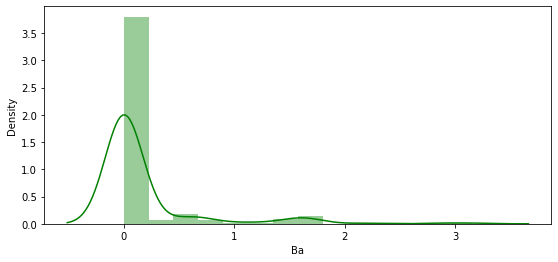

In [26]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(main_df['Ba'], color='green')


Inference: all the distributions are with in the range of 0 to 0.3.

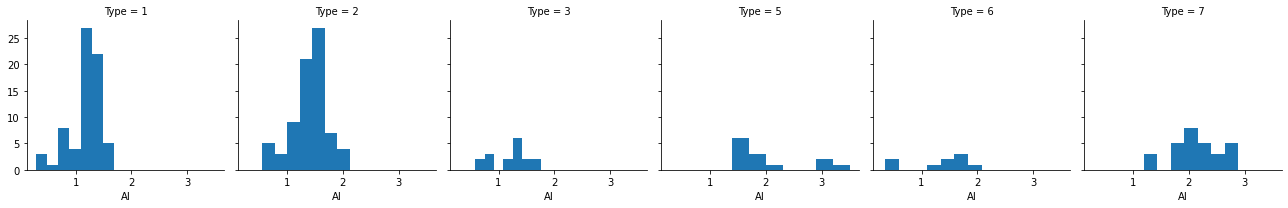

In [27]:
g = sns.FacetGrid(main_df, col='Type')
g.map(plt.hist, 'Al', bins=7)

Inference : AL has more impact on type 1 and type 2 with values ranging from 1 to 2 adn 1 to 2.2 respectively.

WHY : we are not able to predict probabilities of happening type feature with other features with good accurancy but SVM(linear) accuaracy is good when compared to Naives bayes approach because we are able to draw support vectors and margin to predict the data with high accuracy.